In [9]:
import numpy as np
from bresenham import bresenham
import matplotlib.pyplot as plt

class SignalToImageConverter:
    def __init__(self, signal, resolution, dummy):
        self.resolution = resolution
        self.dummy = dummy
        self.signal = signal
        self.signal_length = len(signal[0])
    
    def signal_to_pair(self):
        transform_data = []
        for sample in self.signal:
            y1 = np.searchsorted(np.arange(0, 1 + self.resolution, self.resolution), sample[:-1]) - 1
            y2 = np.searchsorted(np.arange(0, 1 + self.resolution, self.resolution), sample[1:]) - 1
            temp_x = list(zip(np.arange(0, self.signal_length * self.dummy, self.dummy)[:-1], y1,
                              np.arange(self.dummy, self.signal_length * self.dummy + 1, self.dummy)[:-1], y2))
            transform_data.append(temp_x)
        return transform_data
    
    def bresenham_pair_to_image(self, convert):
        img_x_ax = np.arange(0, self.signal_length * self.dummy)
        img_y_ax = np.arange(0, 1 + self.resolution, self.resolution)
        zeros = np.zeros((len(img_y_ax), len(img_x_ax)))
        final_images = []
        for sample in convert:
            zeros.fill(0)  # Reset the values for each sample
            for pair in sample:
                x0, y0, x1, y1 = pair
                bresenham_output = list(bresenham(x0, y0, x1, y1))
                img_x, img_y = zip(*bresenham_output)
                zeros[img_y, img_x] = 255
            final_images.append(np.flipud(zeros))
        return np.array(final_images)


# Example usage:
signal = np.random.rand(10, 100)  # Replace with your signal data
resolution = 0.01  # Replace with the desired resolution
dummy = 5  # Replace with the desired dummy value

converter = SignalToImageConverter(signal, resolution, dummy)
paired_data = converter.signal_to_pair()
images = converter.bresenham_pair_to_image(paired_data)

print('Generated images shape:', images.shape)


Generated images shape: (10, 101, 500)


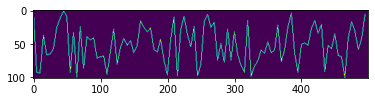

In [10]:
plt.imshow(images[1])